In [87]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


В этом задании вы научитесь прогнозировать исход события (принадлежность рубрики к классу геозависимых или геонезависимых) на основе некоторых характеристик рубрики, которые нам известны.

Используя приложенный файл данных, выполните следующие задания:
1. Оцените, какие признаки вносят значимый вклад в разделение рубрик на геозависимые и геонезависимые, и оставьте для включения в модель только те, которые значимо дифференцируют рубрики.
2. Выберите две модельи наиболее, на Ваш взгляд, подходящие для решения задачи классификации рубрик. Кратко (1-2 абзаца) обоснуйте свой выбор.
3. Постройте первую из двух выбранных моделей, кратко охарактеризуйте вклад отдельных признаков в "судьбу" рубрики: что "способствует" геозависимости, а что, напротив, освобождает рубрику от территориальной привязки?
4. Постройте вторую модель, сравните результат, полученный на разных моделях.
5. Коротко (на 1-2 абзаца) объясните различия в результате, если таковые будут выявлены.
6. Постройте прогноз для нескольких (2-3) рубрик: в какой класс они попадут и с какой вероятностью?

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [89]:
data = pd.read_csv("/content/gdrive/My Drive/data_analysis/data/course_3/Data_Projects.csv", sep=";", thousands='.') 
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,"0,416104363472785","0,535762483130904",1125,"749,966084023684",1
1,17,37,258,20,"0,211678832116788","0,430656934306569",157,"2289,03242434015",0
2,78,56,1956,185,"0,349475383373688","0,476594027441485",1195,"1423,37651183958",1
3,14,70,378,19,"0,318718381112985","0,463743676222597",206,"3396,56608856838",0
4,111,90,4089,90,"0,55617545209696","0,490573297422085",2934,"1576,51415402623",1


In [90]:
data = data.replace(regex=r',', value='.')
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,0.416104363472785,0.535762483130904,1125,749.966084023684,1
1,17,37,258,20,0.211678832116788,0.430656934306569,157,2289.03242434015,0
2,78,56,1956,185,0.349475383373688,0.476594027441485,1195,1423.37651183958,1
3,14,70,378,19,0.318718381112985,0.463743676222597,206,3396.56608856838,0
4,111,90,4089,90,0.55617545209696,0.490573297422085,2934,1576.51415402623,1


In [0]:
data['GeoPart'] = pd.to_numeric(data['GeoPart'])
data['MobilePart'] = pd.to_numeric(data['MobilePart'])
data['Distance'] = pd.to_numeric(data['Distance'])

In [92]:
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,0.416104,0.535762,1125,749.966084,1
1,17,37,258,20,0.211679,0.430657,157,2289.032424,0
2,78,56,1956,185,0.349475,0.476594,1195,1423.376512,1
3,14,70,378,19,0.318718,0.463744,206,3396.566089,0
4,111,90,4089,90,0.556175,0.490573,2934,1576.514154,1


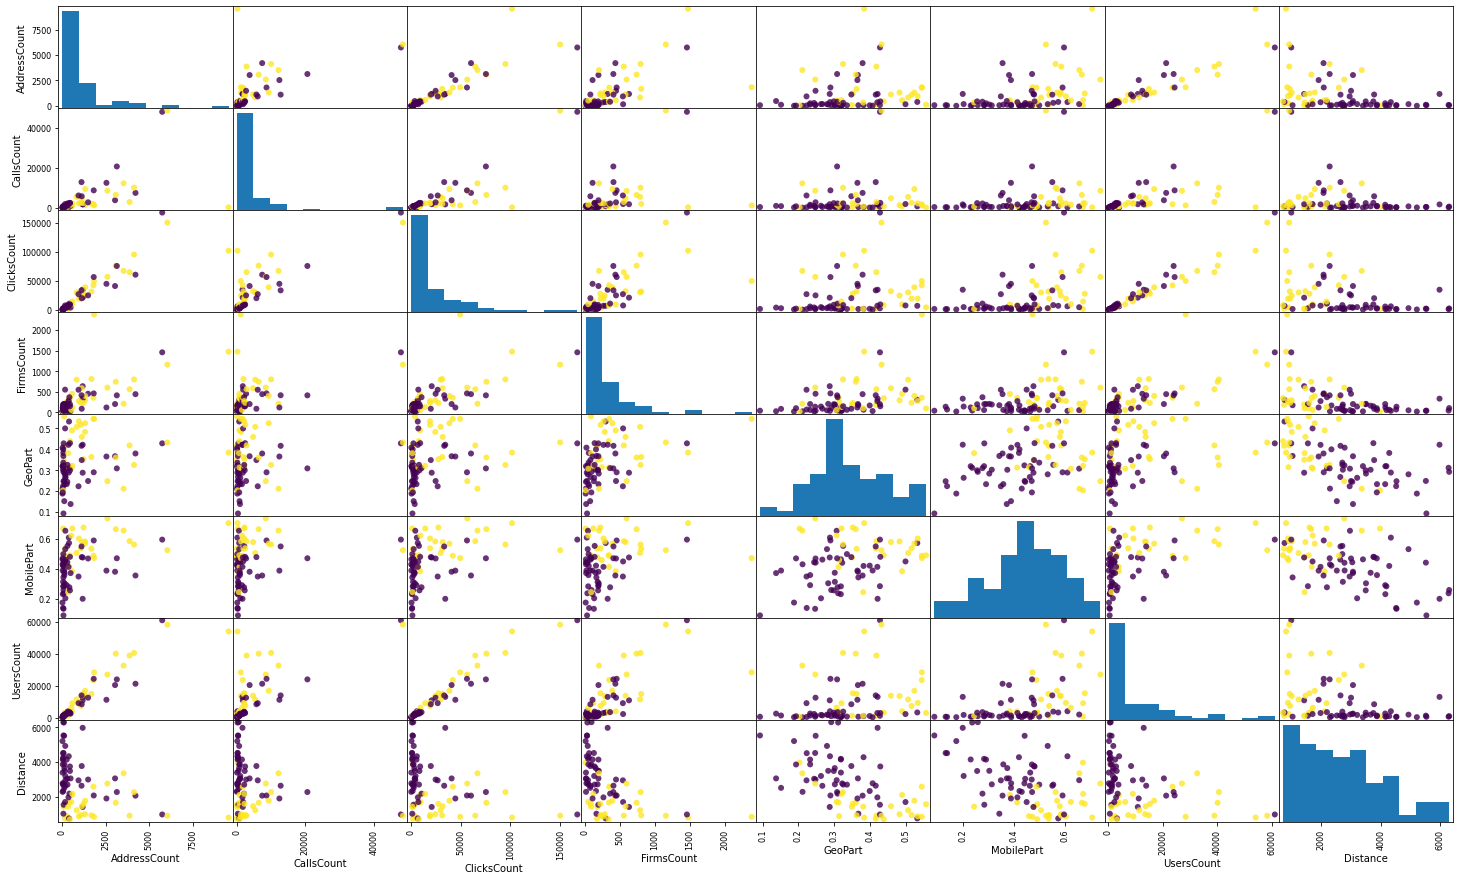

In [93]:
pd.plotting.scatter_matrix(data[data.columns[:-1]], alpha=0.8, figsize=(25, 15), marker='o', c=data['IsGeo'])
plt.show()

In [94]:
columns = data.columns[:4].tolist() + ['UsersCount', 'Distance']
columns

['AddressCount',
 'CallsCount',
 'ClicksCount',
 'FirmsCount',
 'UsersCount',
 'Distance']

In [0]:
for col in columns:
    data[col] = np.log(data[col])

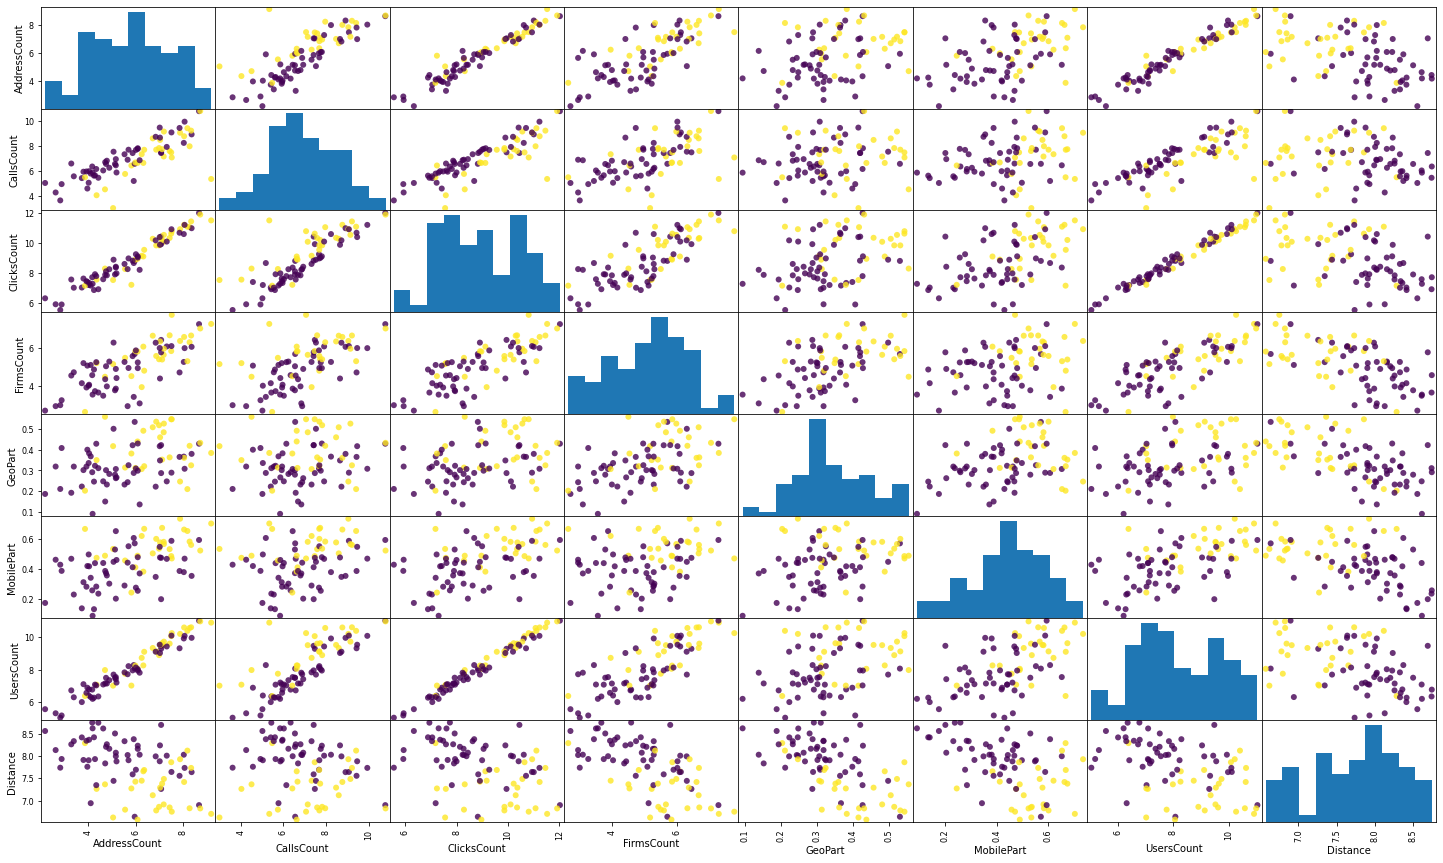

In [96]:
pd.plotting.scatter_matrix(data[data.columns[:-1]], alpha=0.8, figsize=(25, 15), marker='o', c=data['IsGeo'])
plt.show()

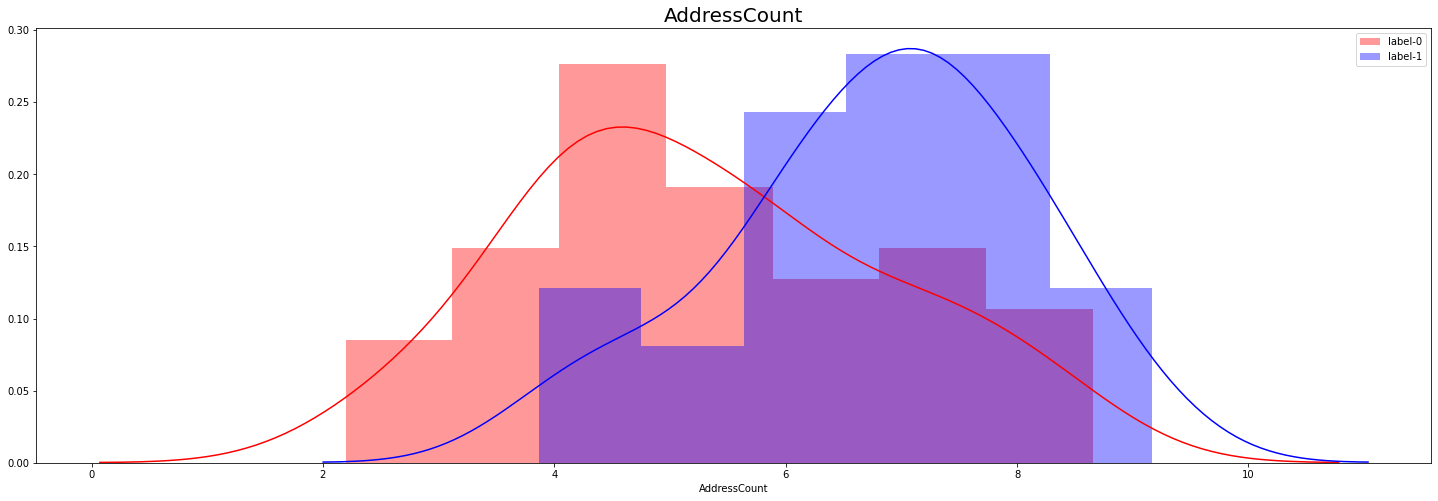

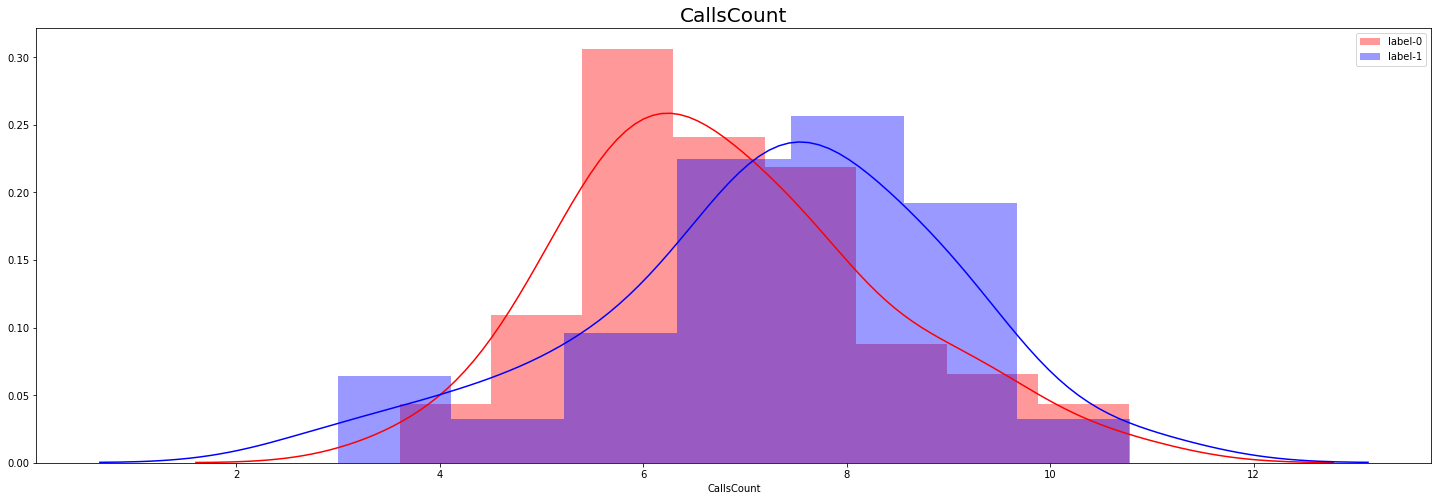

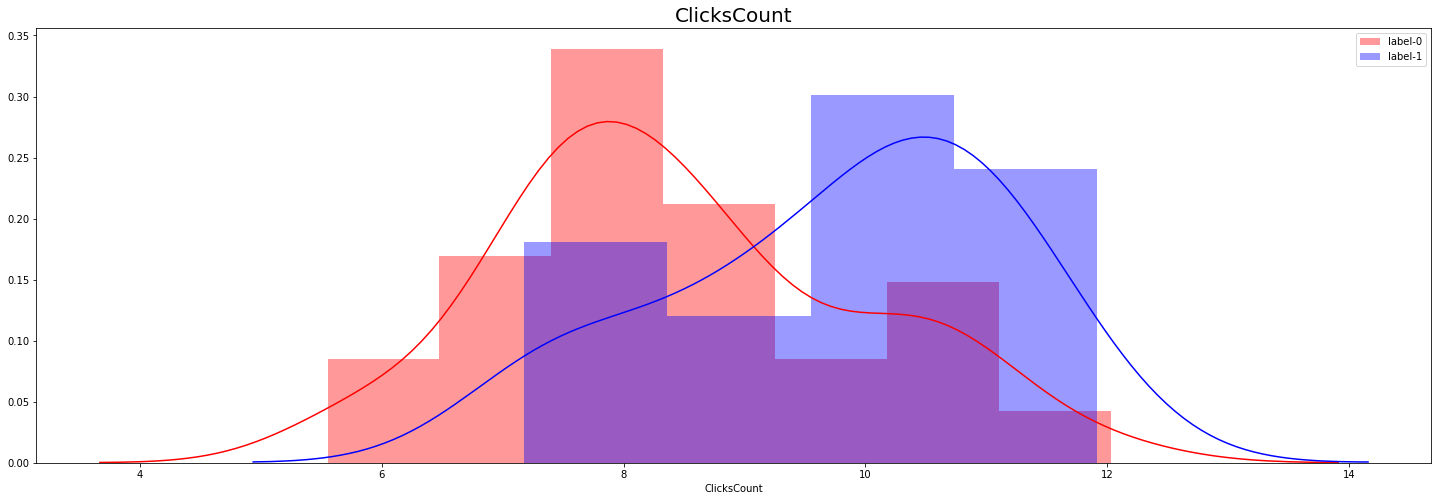

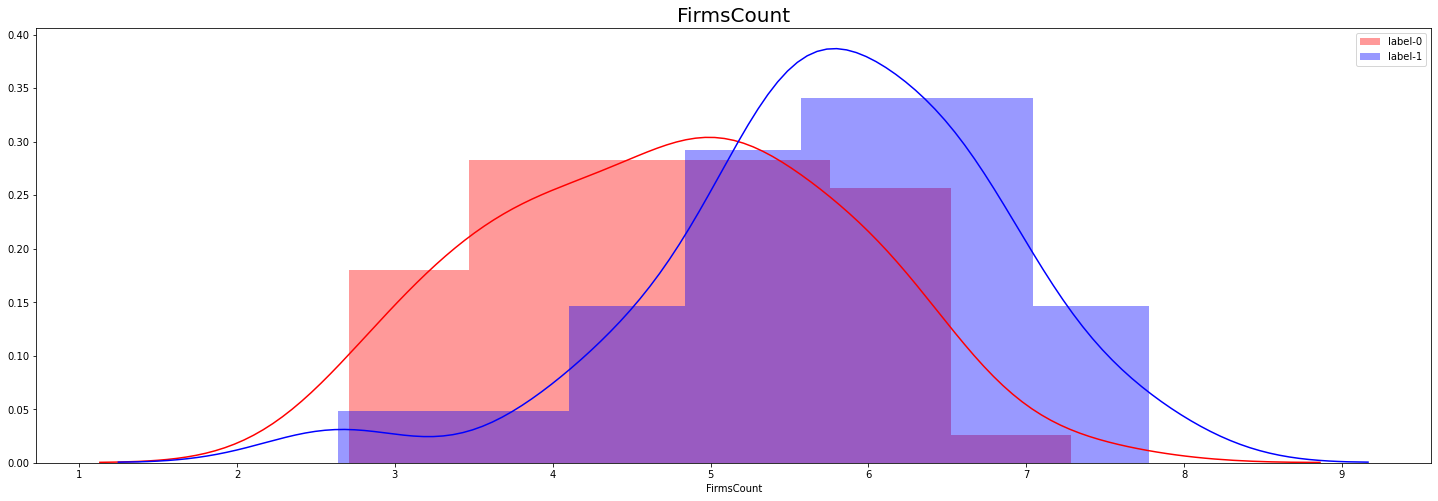

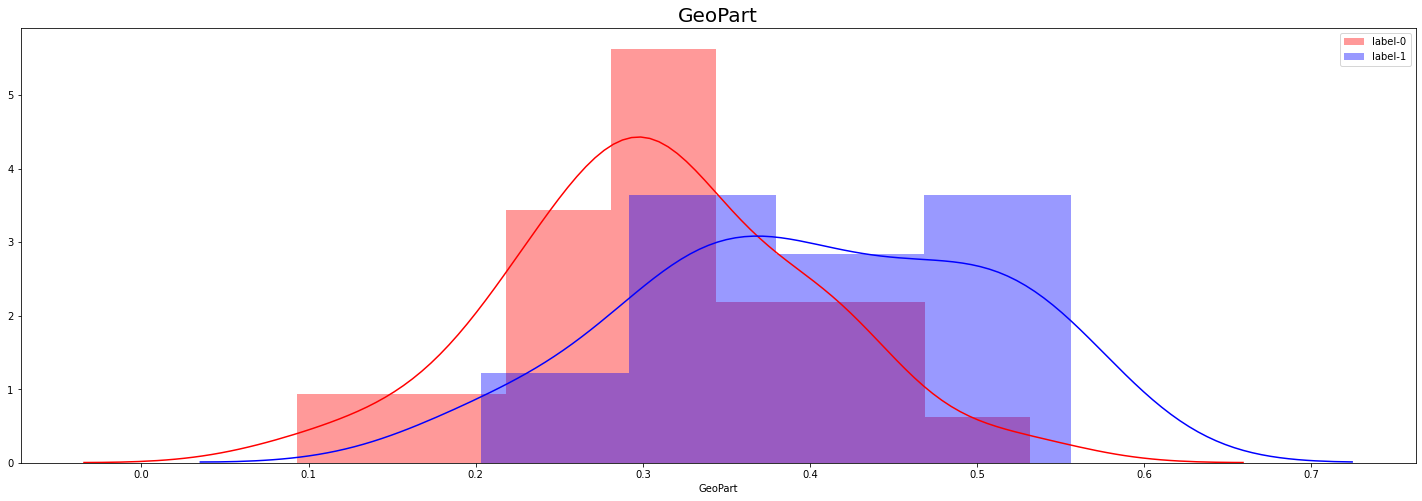

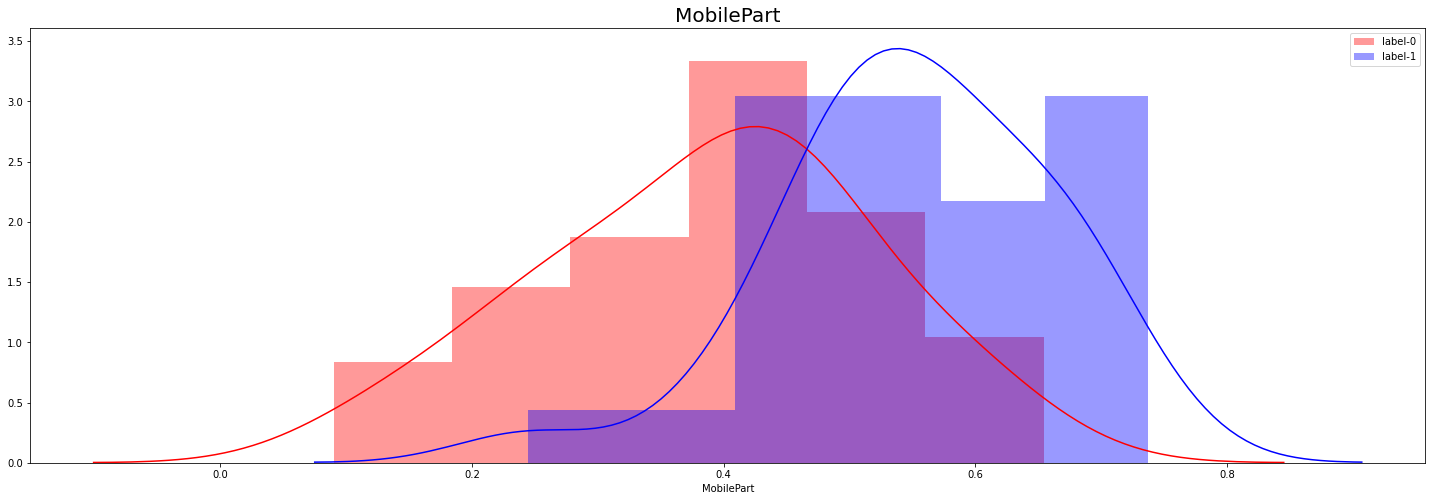

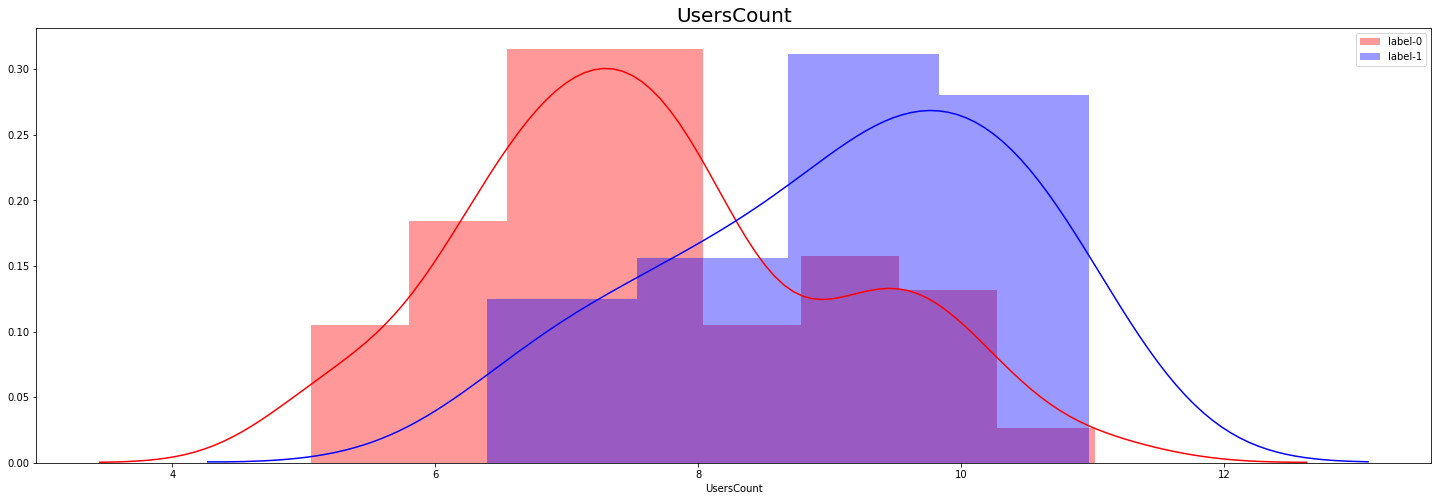

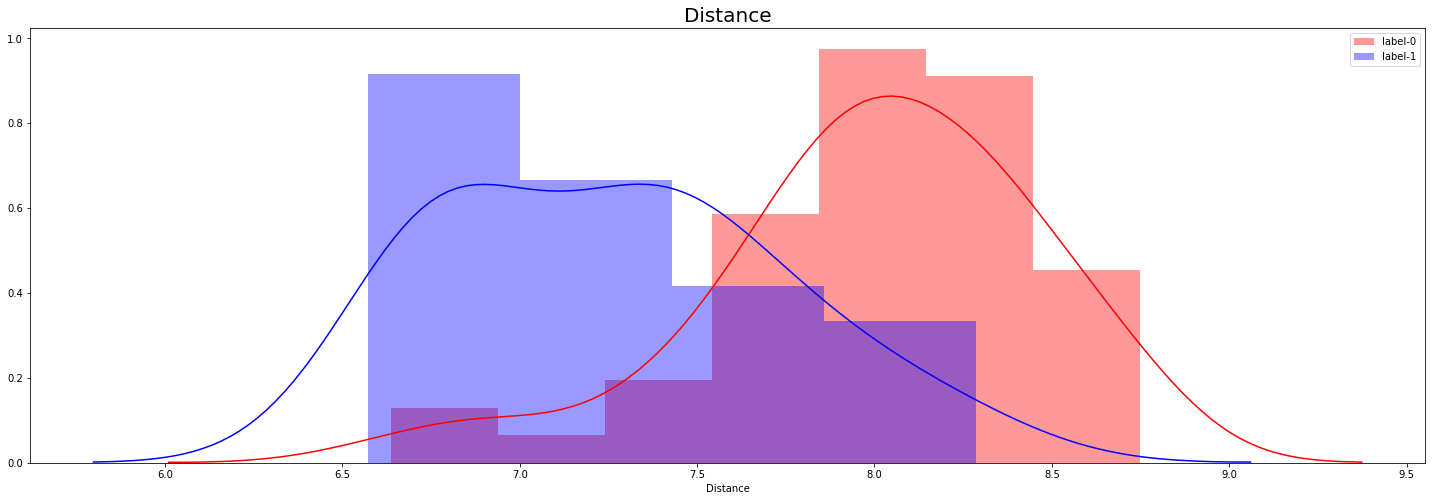

In [97]:
for col in data.columns[:-1]:
    plt.figure(figsize=(25, 8))
    sns.distplot(data[data['IsGeo'] == 0][col], color='r', label='label-0')
    sns.distplot(data[data['IsGeo'] == 1][col], color='b', label='label-1')
    plt.legend()
    plt.title(col, fontsize=20)
    plt.show()

In [0]:
randf = RandomForestClassifier(n_estimators=500, random_state=31)
logreg = LogisticRegression(penalty='l2')
nb = GaussianNB()

In [105]:
for col in data.columns[:-1].tolist():
    print(col, 'is droped')
    print(round(np.mean(cross_val_score(randf, data[data.columns[:-1]].drop(col, axis=1), y=data['IsGeo'], cv=5)), 4), 'для Random Forest Classifier')
    print(round(np.mean(cross_val_score(logreg, data[data.columns[:-1]].drop(col, axis=1), y=data['IsGeo'], cv=5)), 4), 'для Logistic Regression')
    print(round(np.mean(cross_val_score(nb, data[data.columns[:-1]].drop(col, axis=1), y=data['IsGeo'], cv=5)), 4), 'для Naive Bayes')
    print()

print('With all features')
print(round(np.mean(cross_val_score(randf, data[data.columns[:-1]], y=data['IsGeo'], cv=5)), 4), 'для Random Forest Classifier')
print(round(np.mean(cross_val_score(logreg, data[data.columns[:-1]], y=data['IsGeo'], cv=5)), 4), 'для Logistic Regression')
print(round(np.mean(cross_val_score(nb, data[data.columns[:-1]], y=data['IsGeo'], cv=5)), 4), 'для Naive Bayes')

AddressCount is droped
0.745 для Random Forest Classifier
0.8067 для Logistic Regression
0.7042 для Naive Bayes

CallsCount is droped
0.7192 для Random Forest Classifier
0.7558 для Logistic Regression
0.7167 для Naive Bayes

ClicksCount is droped
0.7317 для Random Forest Classifier
0.8067 для Logistic Regression
0.7167 для Naive Bayes

FirmsCount is droped
0.7317 для Random Forest Classifier
0.8067 для Logistic Regression
0.7292 для Naive Bayes

GeoPart is droped
0.6933 для Random Forest Classifier
0.7942 для Logistic Regression
0.7292 для Naive Bayes

MobilePart is droped
0.6675 для Random Forest Classifier
0.7942 для Logistic Regression
0.6792 для Naive Bayes

UsersCount is droped
0.7325 для Random Forest Classifier
0.8067 для Logistic Regression
0.7042 для Naive Bayes

Distance is droped
0.6683 для Random Forest Classifier
0.745 для Logistic Regression
0.6667 для Naive Bayes

With all features
0.7192 для Random Forest Classifier
0.7942 для Logistic Regression
0.7167 для Naive Bayes


**Для модели Random Forest удаление GeoPart, MobilePart, Distance ухудшает модель по roc_auc_score.**

**Для модели Logistic Regression удаление CallsCount, UsersCount, Distance ухудшает модель по roc_auc_score**

**Naive Bayes показывает хуже результат чем предыдущие две модели, поэтому будем строить только их.**

In [0]:
rf_cols = ['GeoPart', 'MobilePart', 'Distance']
lr_cols = ['CallsCount', 'UsersCount', 'Distance']

In [107]:
randf = RandomForestClassifier(n_estimators=500, random_state=31)
randf.fit(data[rf_cols], data['IsGeo'])
print(randf.feature_importances_)

[0.26271669 0.36326171 0.37402161]


**В Random Forest максимальное влияние имеет признак Distance (0.374), чуть менее значим признак MobilePart (0.363), и менее всего значим GeoPart (0.263)**

**В Random Forest усредняются предсказания большого количества деревьев. Одно из таких деревьев представлено ниже. По нему можно проследить логику принятия решения.**

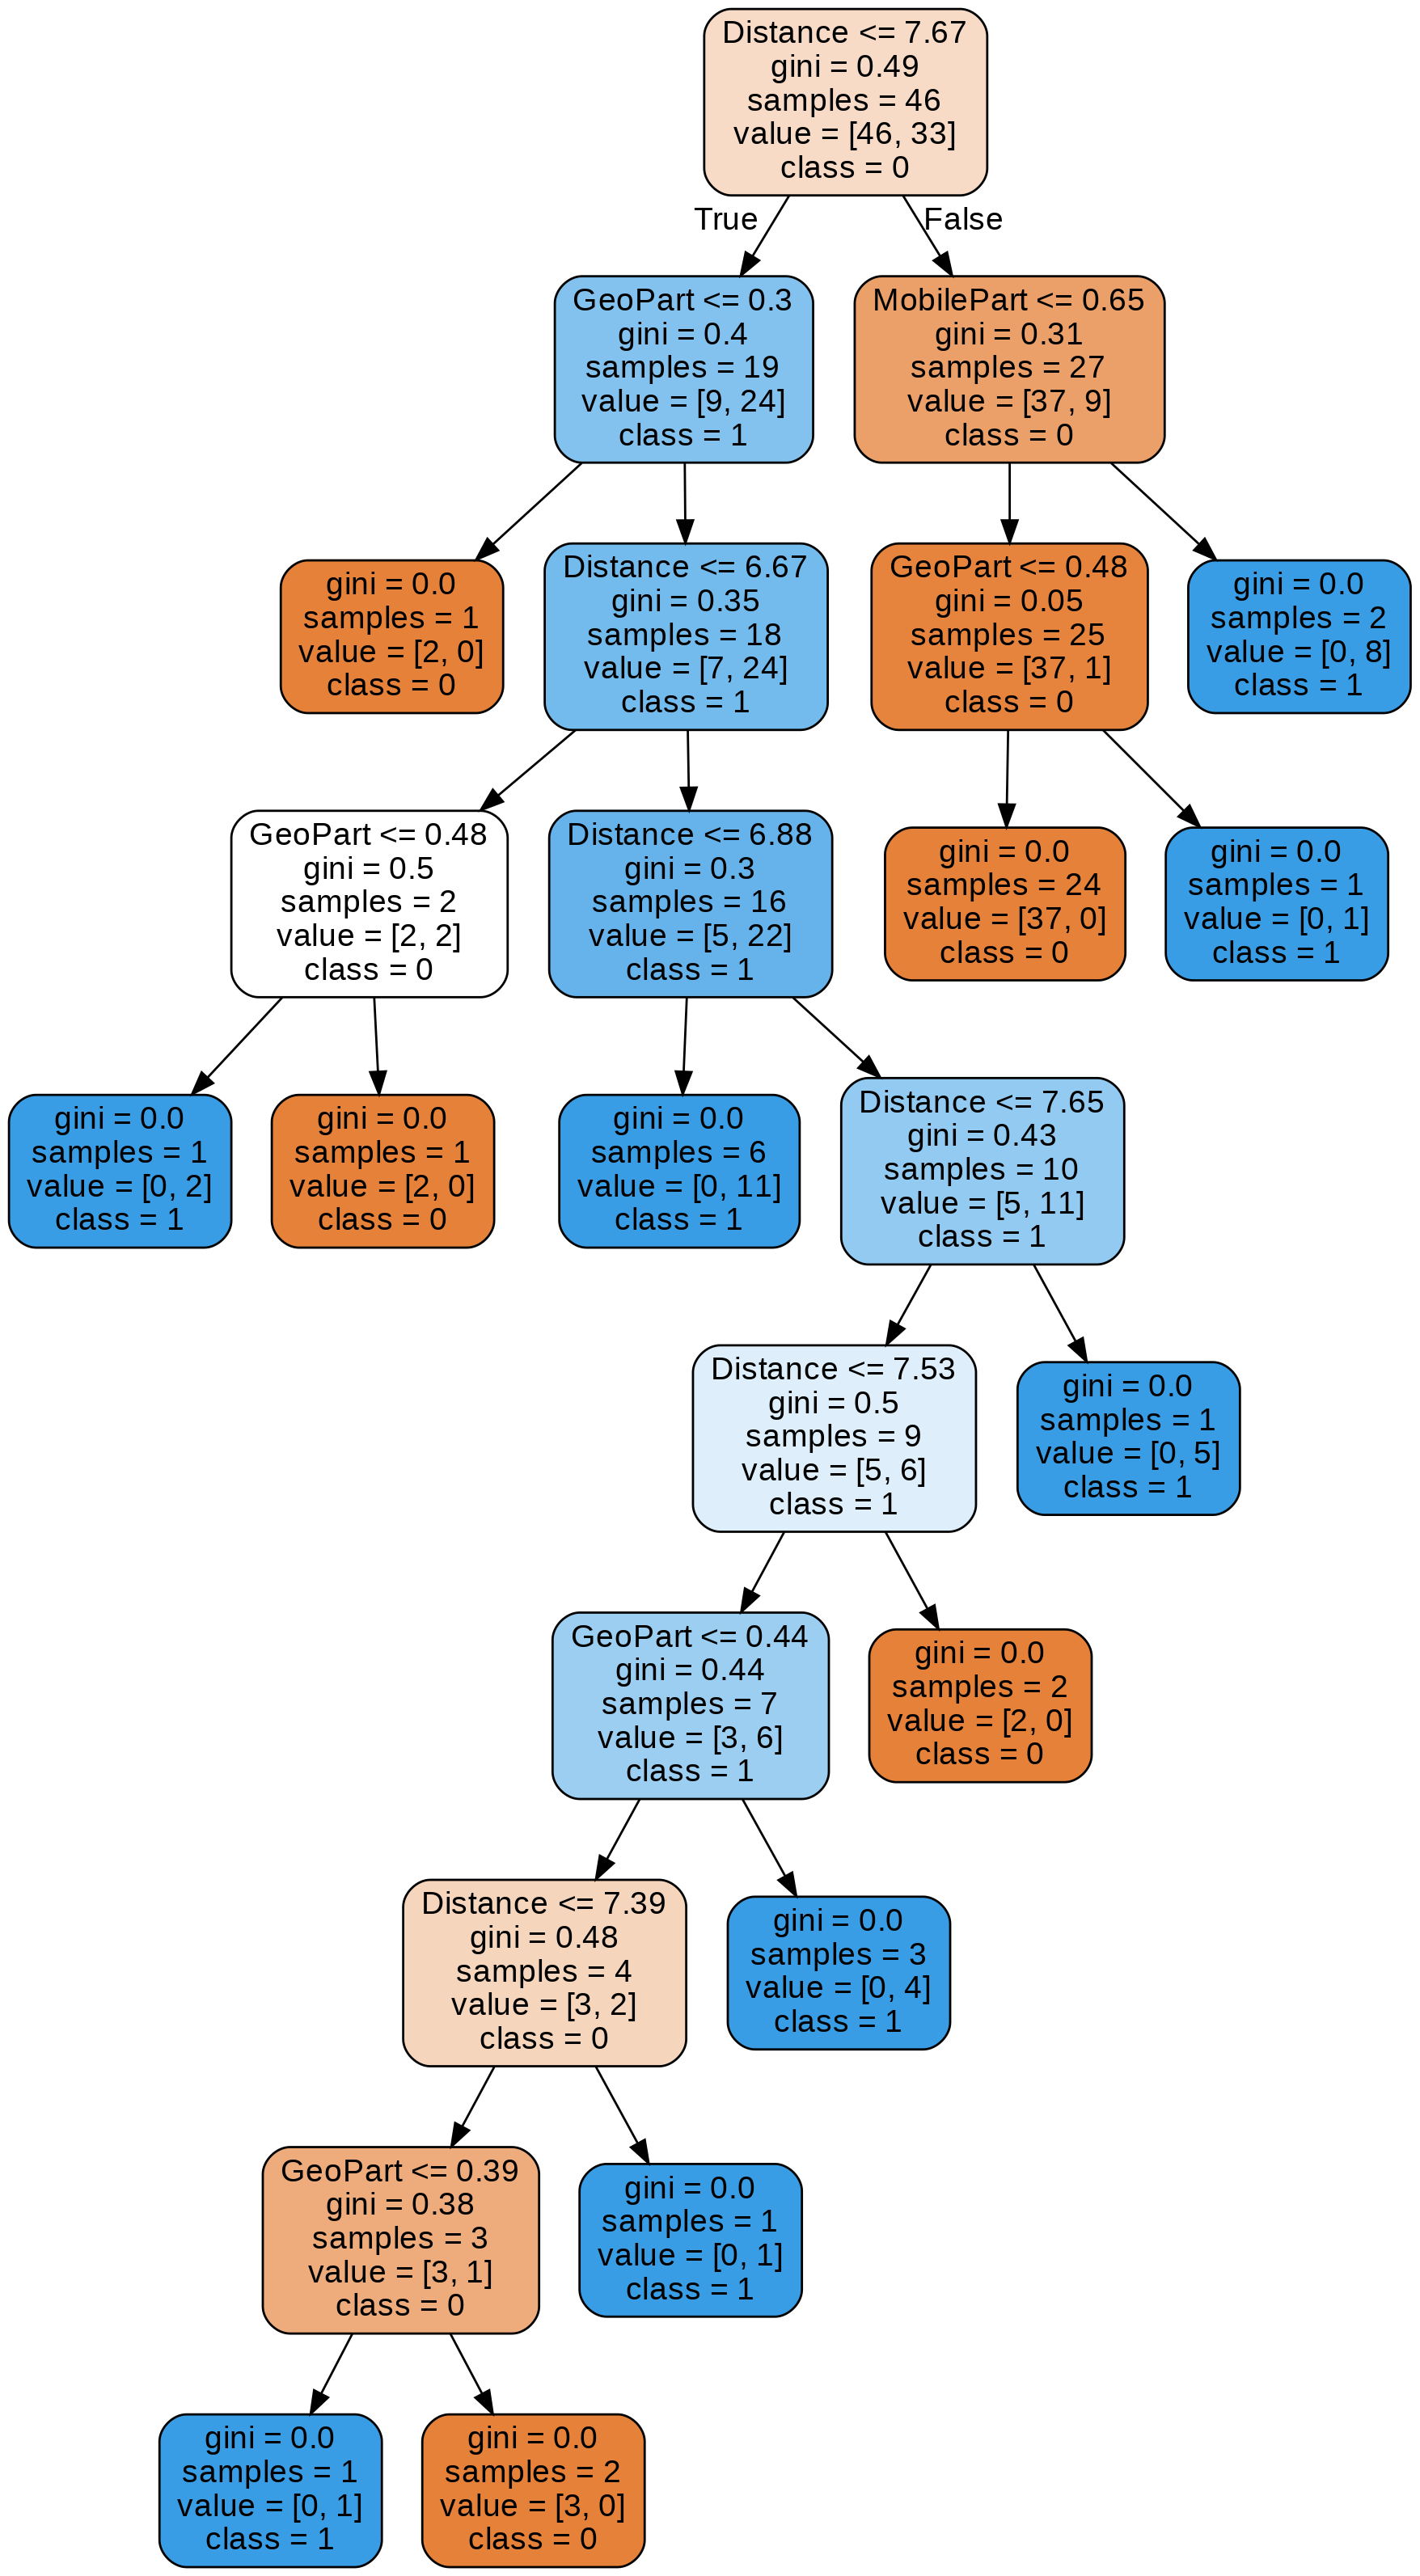

In [113]:
estimator = randf.estimators_[31]

from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = rf_cols,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=200'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [114]:
predicted = pd.DataFrame({'True_Label': data.iloc[-3:]['IsGeo'].values})
predicted['Random_Forest_proba'] = randf.predict_proba(data.iloc[-3:][rf_cols])[:, 1]
predicted['Random_Forest'] = randf.predict(data.iloc[-3:][rf_cols])
predicted.head()

,True_Label,Random_Forest_proba,Random_Forest
0,0,0.086,0
1,0,0.324,0
2,1,0.936,1


In [115]:
logreg = LogisticRegression()
logreg.fit(data[lr_cols], data['IsGeo'])
print(logreg.intercept_)
print(logreg.coef_)

[6.3843691]
[[-0.86322681  1.40469577 -1.65281994]]


**Для уравнения логистической регрессии мы получили коэффициент смещения равный 6,384 и коэффициенты -0.86322681, 1.40469577, -1.65281994 для CallsCount, UsersCount, Distance соответственно.**

**Предсказания последних трех элементов выборки обоими моделями можно увидеть в датафрейме ниже. В proba представлена вероятность отнесения к данному классу.**

In [116]:
predicted['LogReg_proba'] = logreg.predict_proba(data.iloc[-3:][lr_cols])[:, 1]
predicted['LogReg'] = logreg.predict(data.iloc[-3:][lr_cols])
predicted.head()

,True_Label,Random_Forest_proba,Random_Forest,LogReg_proba,LogReg
0,0,0.086,0,0.309556,0
1,0,0.324,0,0.761756,1
2,1,0.936,1,0.770140,1


**Построим еще матрицу ошибок для двух наших моделей**

**Для Logistic Regression**

In [122]:
confusion_matrix(data['IsGeo'], logreg.predict(data[lr_cols]))

array([[46,  5],
       [ 8, 20]])

**Для Random Forest**

In [123]:
confusion_matrix(data['IsGeo'], randf.predict(data[rf_cols]))

array([[51,  0],
       [ 0, 28]])

**И построим ROC-кривую**

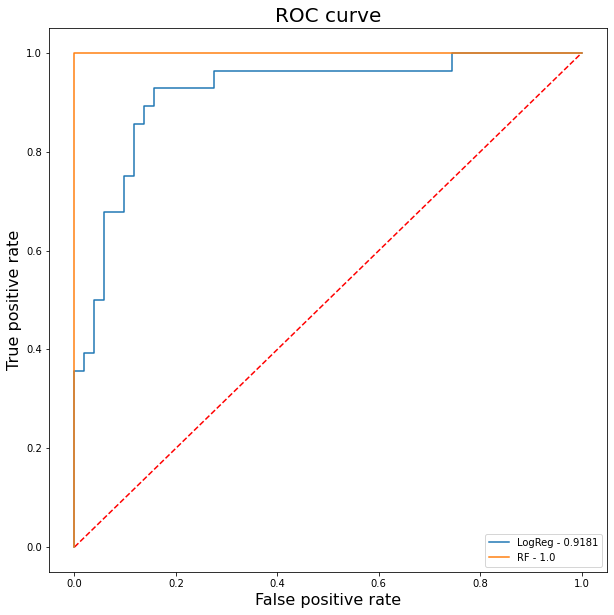

In [124]:
fpr_lr, tpr_lr, _ = roc_curve(data['IsGeo'], logreg.predict_proba(data[lr_cols])[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(data['IsGeo'], randf.predict_proba(data[rf_cols])[:, 1])

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_lr, tpr_lr, label='LogReg - ' + str(round(roc_auc_score(data['IsGeo'], logreg.predict_proba(data[lr_cols])[:, 1]), 4)))
plt.plot(fpr_rf, tpr_rf, label='RF - ' + str(round(roc_auc_score(data['IsGeo'], randf.predict_proba(data[rf_cols])[:, 1]), 4)))
plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('ROC curve', fontsize=20)
plt.legend(loc='best')
plt.show()

**Оценка таким образом модели не совсем правильна, потому что возникает проблема переобучения, но в рамках данного задания это не учитывается.**

**В итоге мы получили хороший результат для наших моделей. Отличия в результатах связанны с тем, что логистическая регрессия - линейный метод, и разделяет классы гиперплоскостью, а наши данные идеально не делятся гиперплоскостью.**

**Random Forest же делит датасет на классы множеством условий (пример одного из таких деревьев есть выше), поэтому имеет более лучший результат.**